<a href="https://colab.research.google.com/github/yuvi00001/Breast-Cancer-Prediction/blob/main/data_visualization_and_prediction_of_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Understanding the question**

1. What is breast cancer?

A cancer that forms in the cells of the breasts.
Breast cancer can occur in women and rarely in men.
Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple and changes in the shape or texture of the nipple or breast.
Its treatment depends on the stage of cancer. It may consist of chemotherapy, radiation, hormone therapy and surgery.

In the dataset breast cancer is diagnosed as 'benign' or 'malignant'

'benign' meaning 'not harmful in effect'

'malignant' meaning 'infectious'

In [2]:
!pip install thinkx
#a library provided by Allen B. Downey, for statistics

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### **1. Exploratory Data Analysis**


In [4]:
#python libraries used for data wrangling and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot

In [5]:
#importing the data
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Classification/data.csv')

In [6]:
#looking into the data
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [7]:
data.shape

(569, 33)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

column 'Unnamed:32' with float64 dtype has all null values.

In [9]:
#removing columns with null values
data.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [10]:
#checking for if any null values left
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# removing the 'id' column as it is not required for our analysis

data.drop(['id'], axis = 1, inplace = True)

In [12]:
#summary statistics of the data

data.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

### **2. Data Visualization**

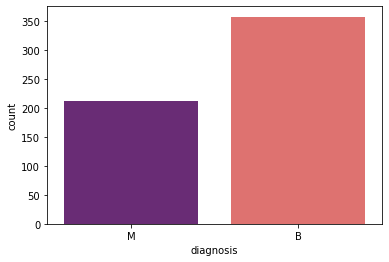

In [13]:
#count of diagnosis outcome

plt.figure()

sns.countplot(x='diagnosis', data = data, palette = 'magma')

In [14]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})


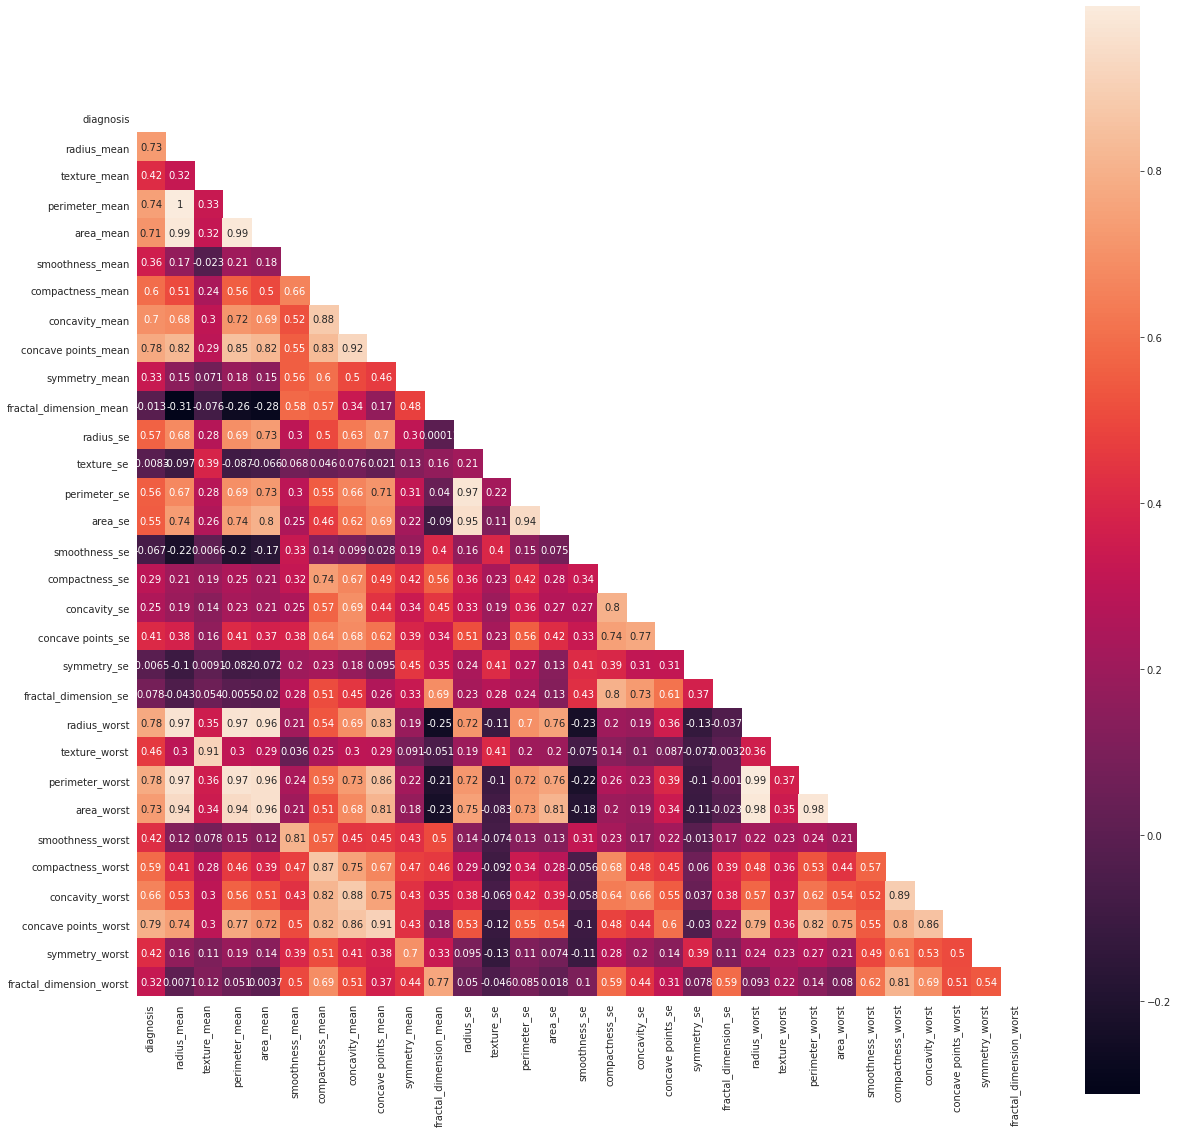

In [15]:
corr = data.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(20, 20))

    ax = sns.heatmap(corr,annot=True, mask=mask, square=True)

In [16]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:


#records which were diagnosed as malignant
M_data = data[data['diagnosis']==1]

#records which diagnosed as benign
B_data = data[data['diagnosis']==0]



In [18]:
M_data['area_mean'].describe()

count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

In [19]:
B_data['area_mean'].describe()

count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64

No handles with labels found to put in legend.


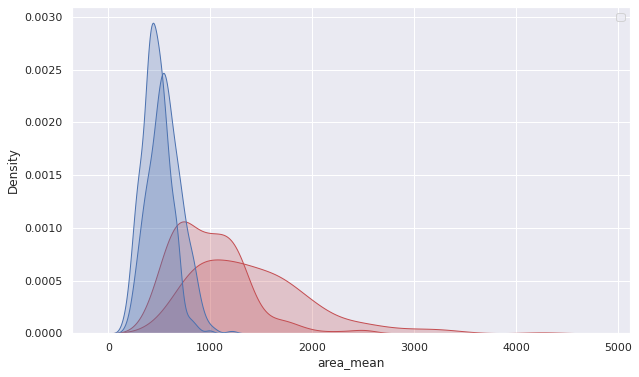

In [20]:
#compairing the area of a normal cell and a cancer cell

sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
fig = sns.kdeplot(M_data['area_mean'], shade=True, color="r")
fig = sns.kdeplot(M_data['area_worst'], shade=True, color="r")
fig = sns.kdeplot(B_data['area_mean'], shade=True, color="b")
fig = sns.kdeplot(B_data['area_worst'], shade=True, color="b")
plt.legend()
plt.show()

From this graph we can observe that, cells that were diagnosed as 'benign' has a meanspread between 143 to 992 ,with the largest cell being with the area 1210 while the cells diagnosed as 'malignant' has a wider spread (between 361 to 2501) and the largest cell has an area of 4254.

Cancer cells are usually larger in area.

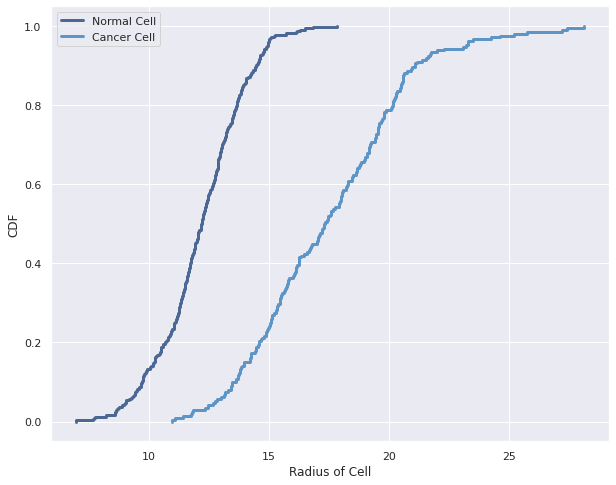

<Figure size 576x432 with 0 Axes>

In [21]:
#compairing the radius of normal cell and a cancer cell using 
#cumulative distribution function(CDF)

cdf_benign = thinkstats2.Cdf(B_data['radius_mean'], label='Normal Cell')
cdf_malignant = thinkstats2.Cdf(M_data['radius_mean'], label='Cancer Cell')

plt.figure(figsize=(10,8))
thinkplot.Cdfs([cdf_benign, cdf_malignant])
thinkplot.Show(xlabel='Radius of Cell', ylabel='CDF')

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [22]:
mean_col = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

standarderror_col = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','diagnosis']

worst_col = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','diagnosis']

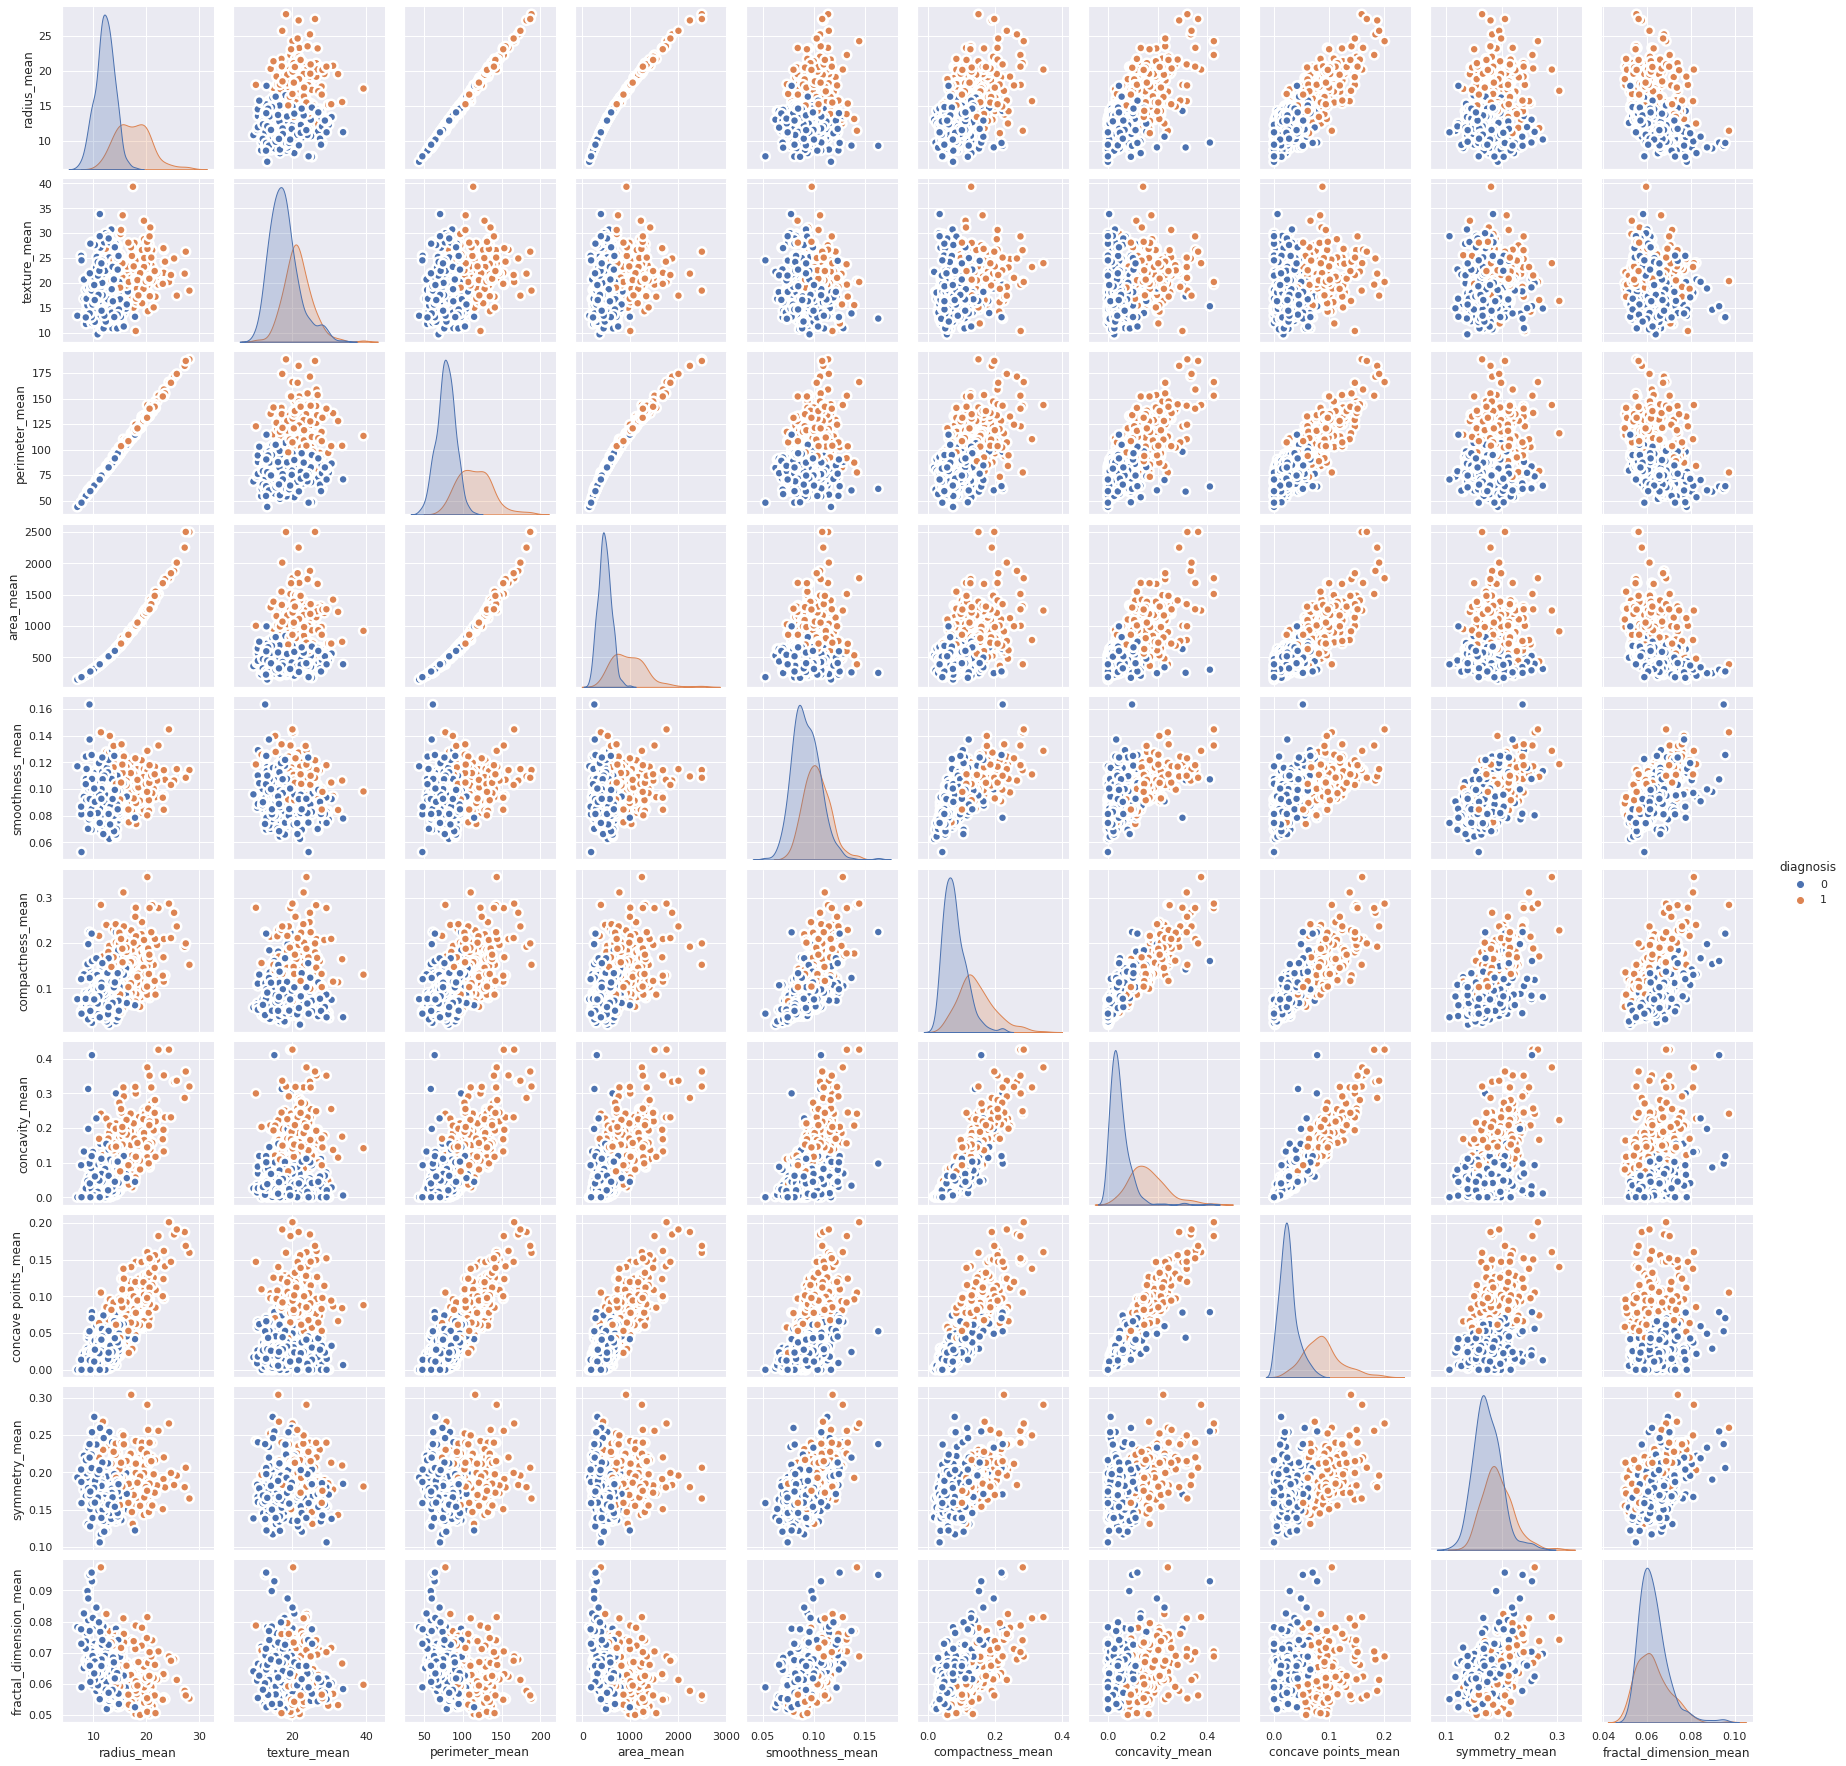

In [23]:
#pairplot for mean columns

sns.pairplot(data[mean_col], kind="scatter", hue="diagnosis", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

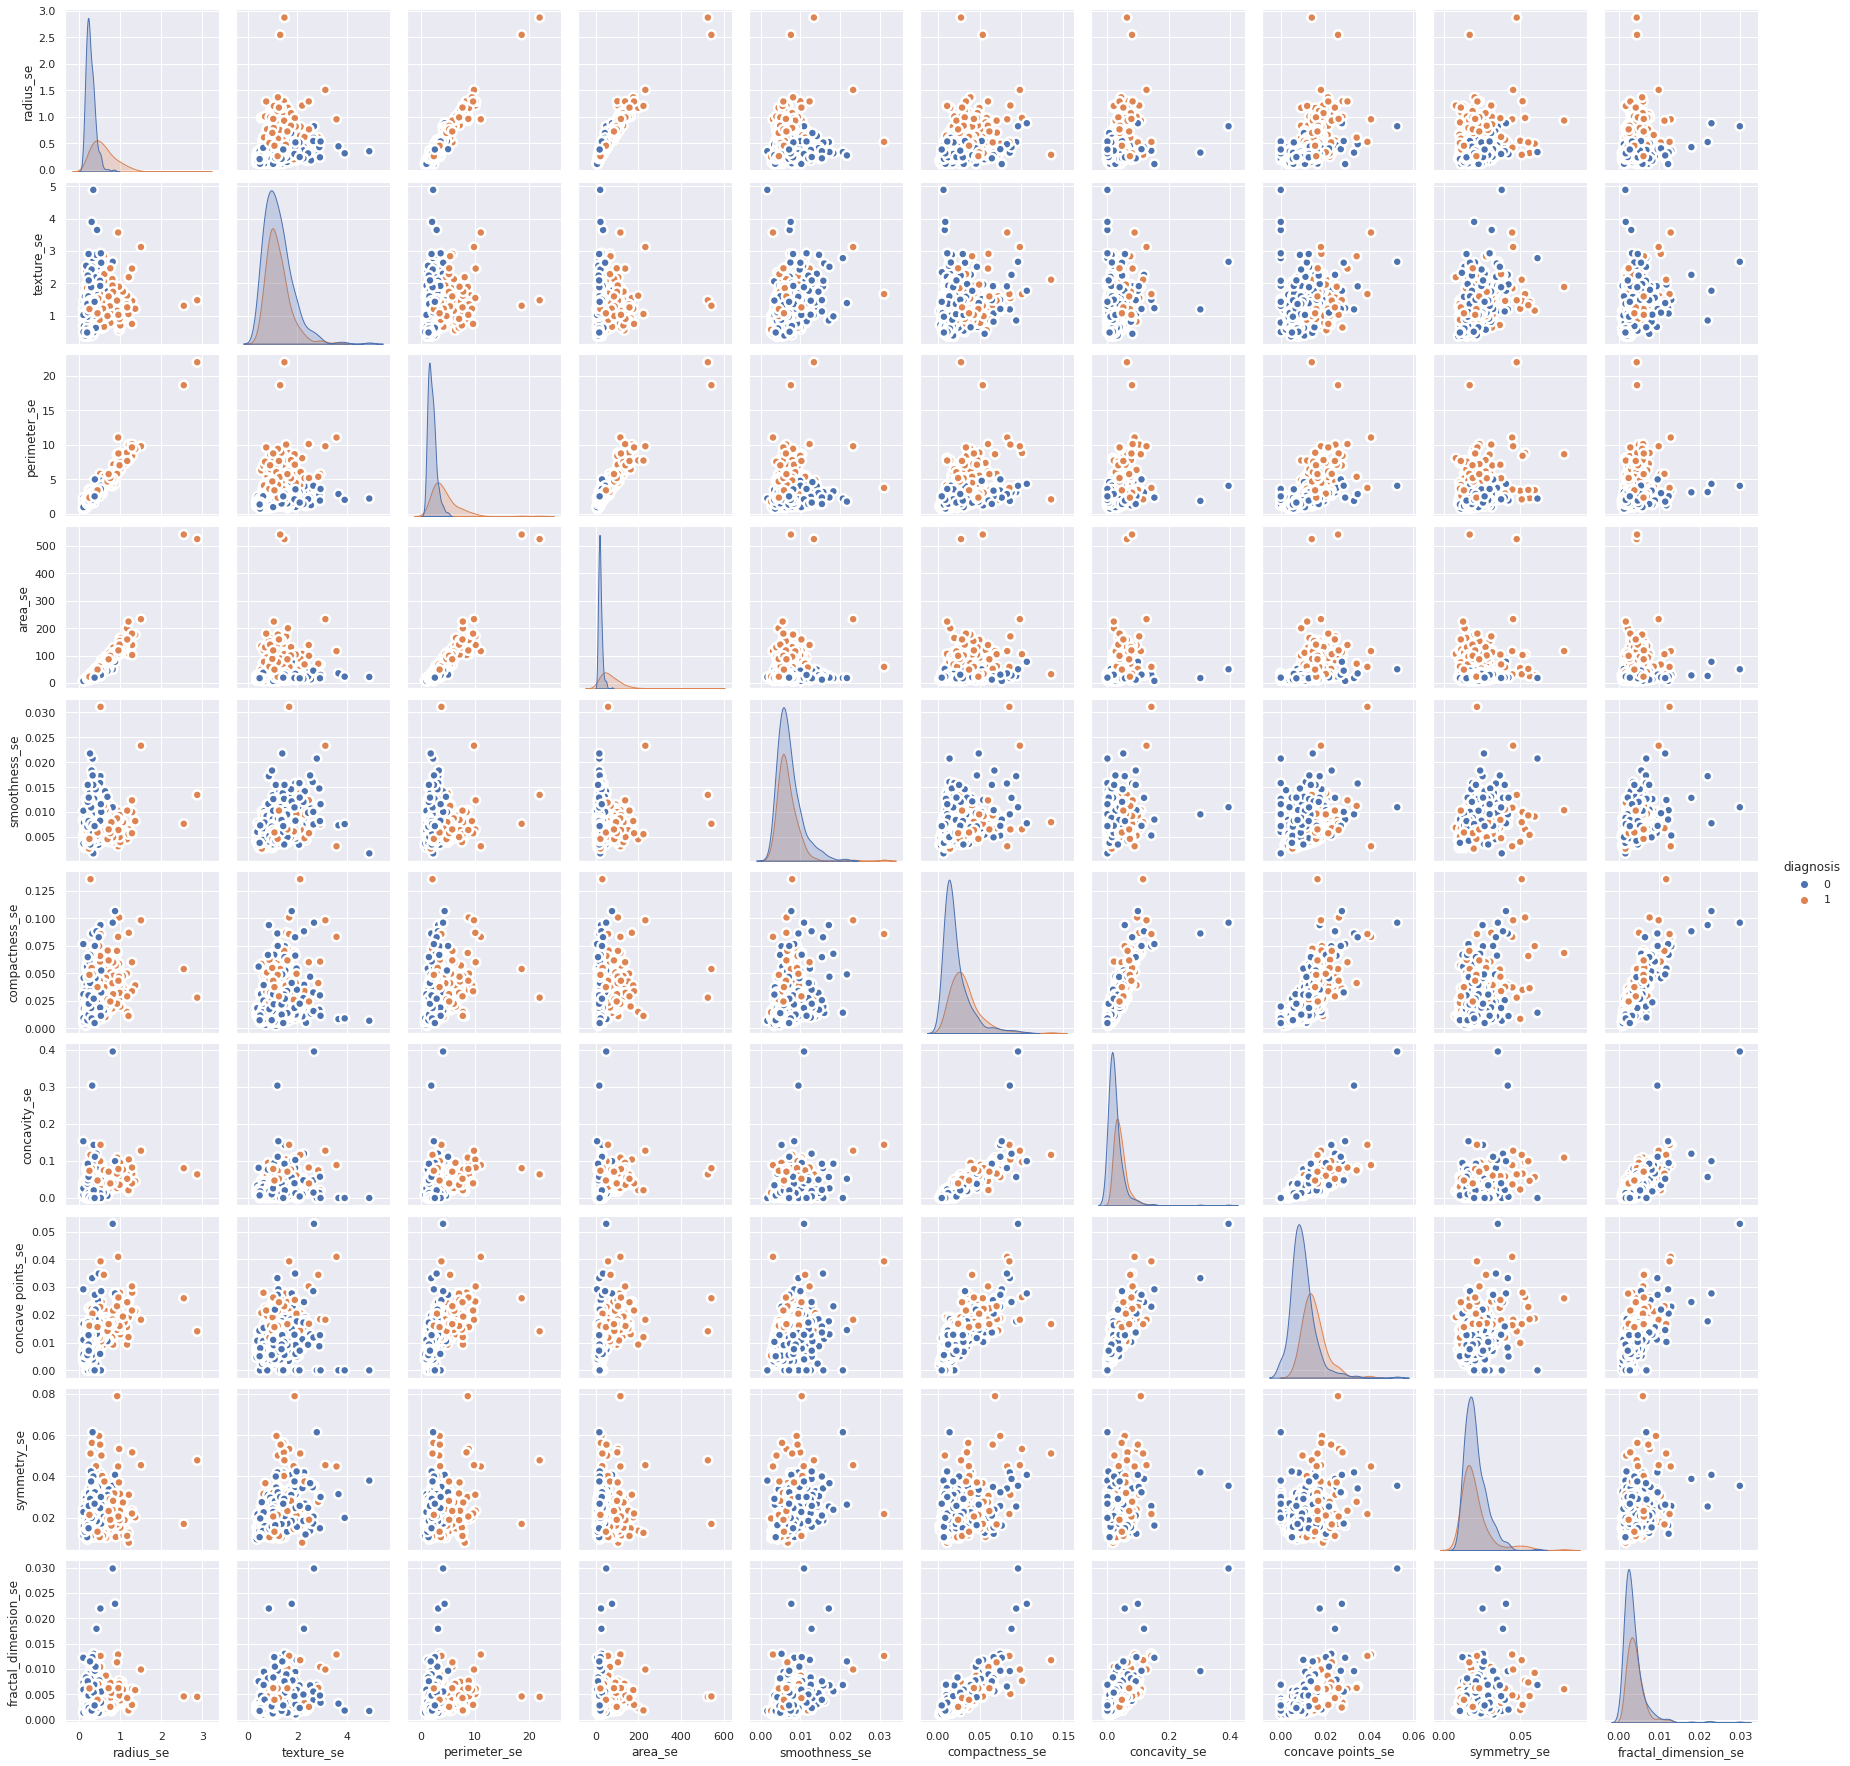

In [24]:
#pairplot for standarderror columns

sns.pairplot(data[standarderror_col], kind="scatter", hue="diagnosis", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

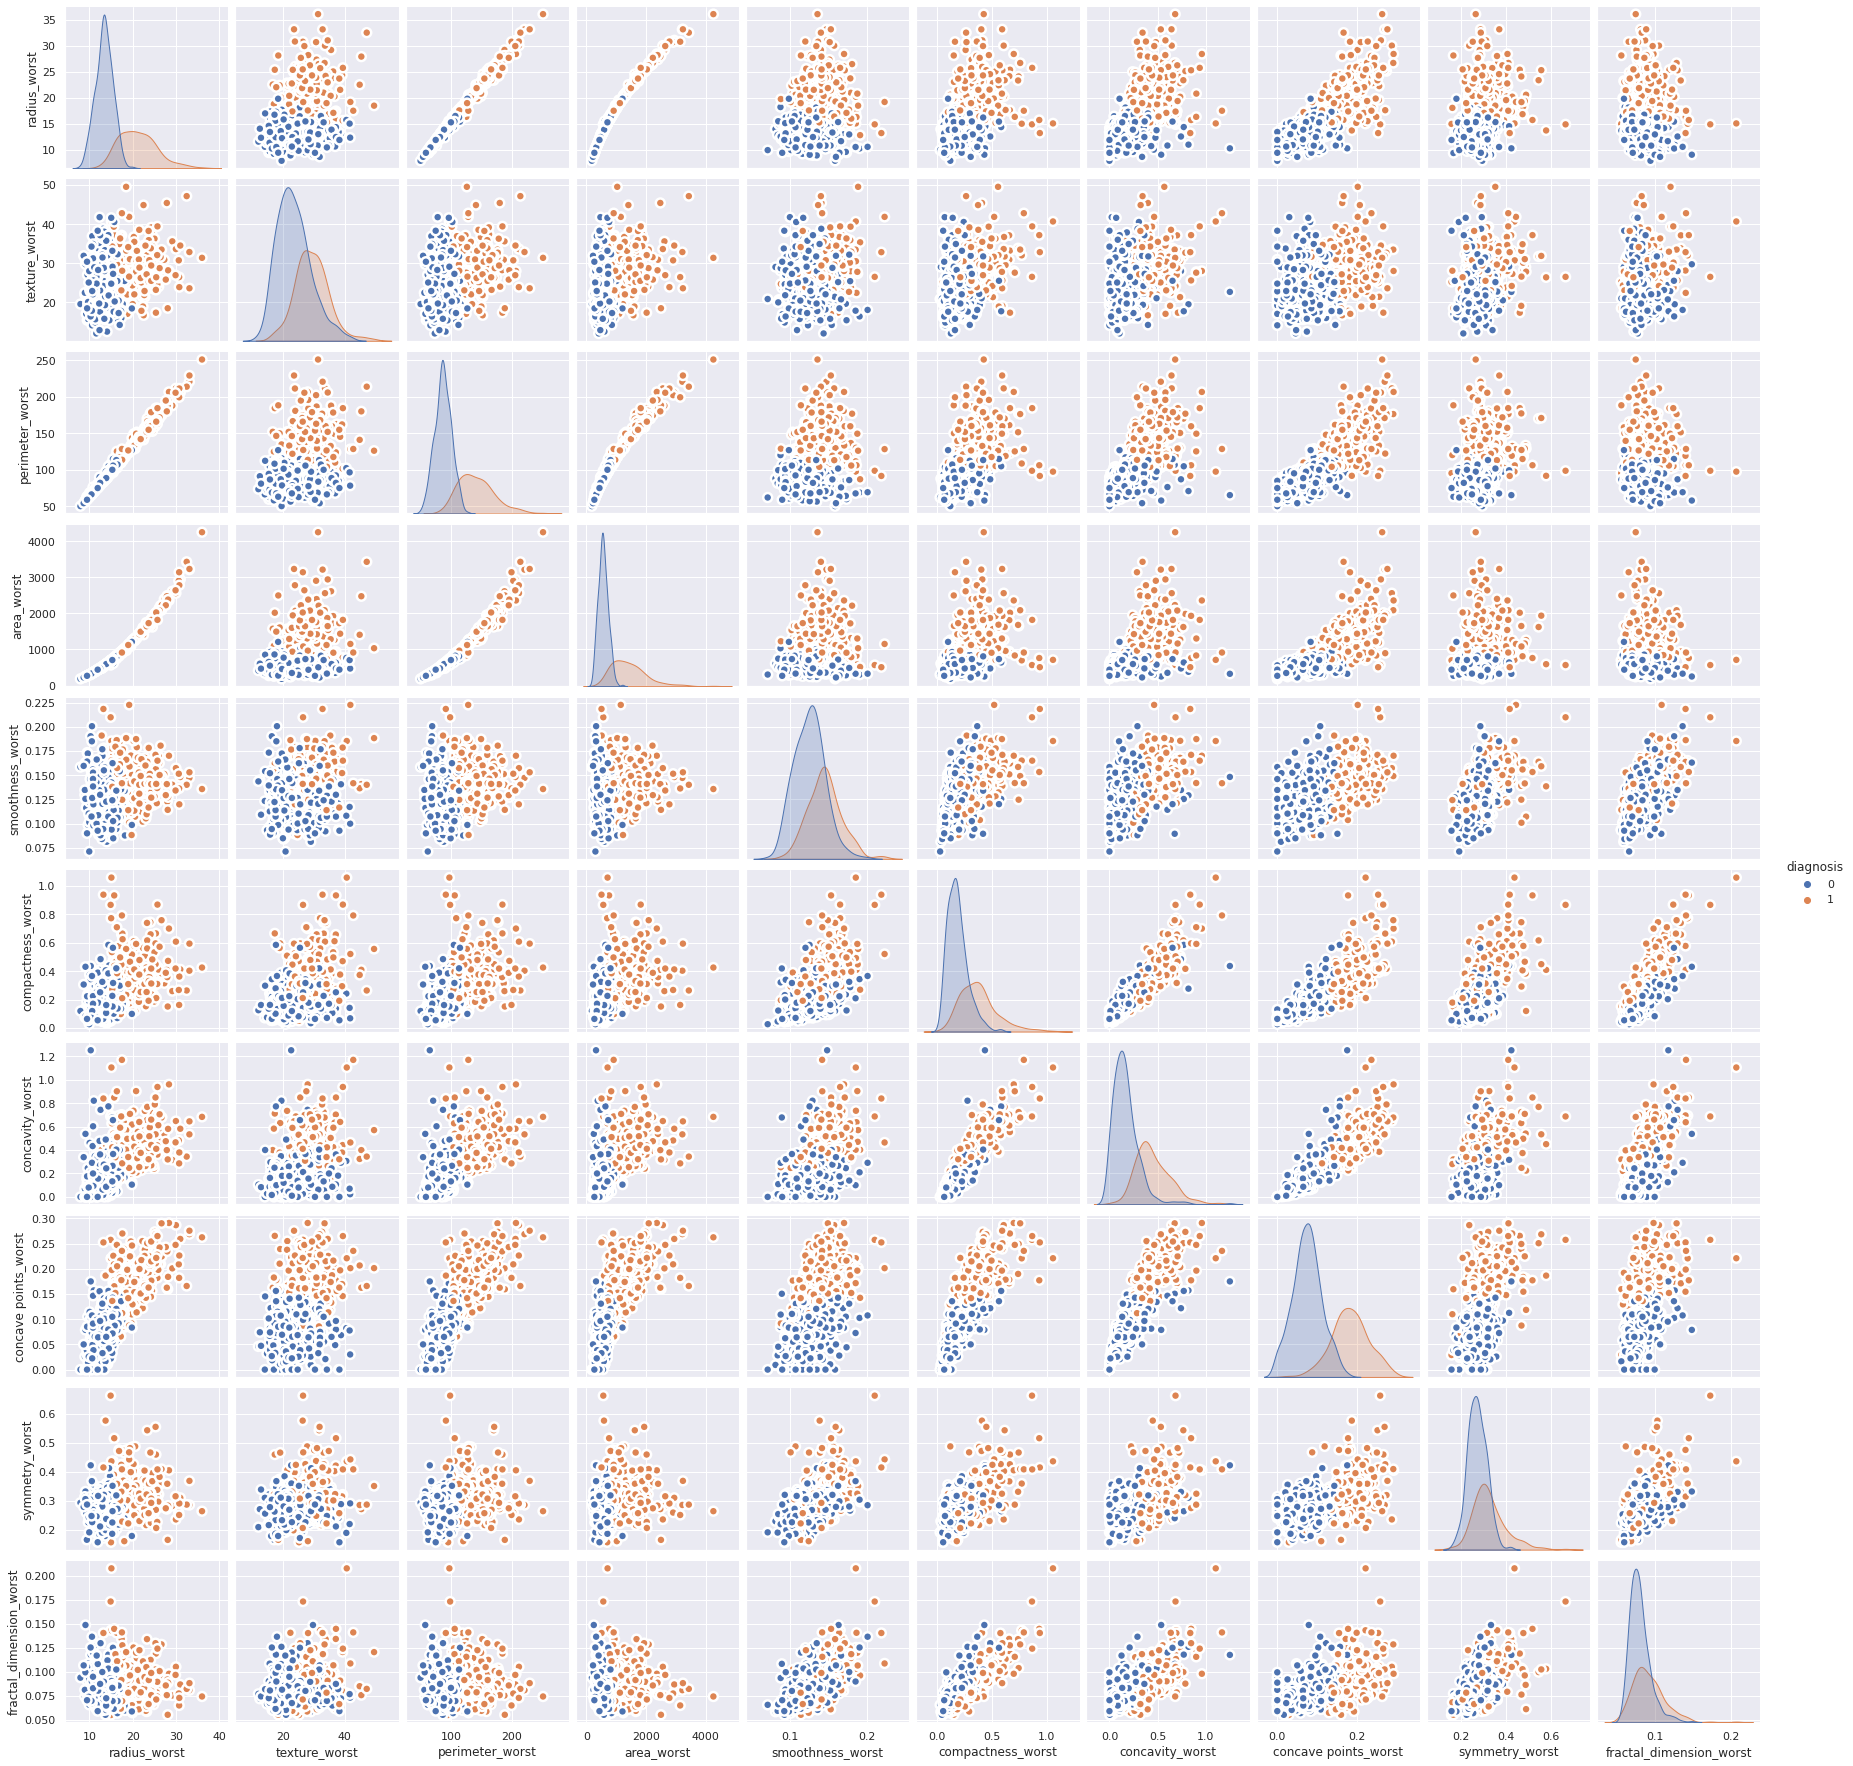

In [25]:
#pairplot for worst columns

sns.pairplot(data[worst_col], kind="scatter", hue="diagnosis", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### **3. Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler



In [27]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

In [28]:
scaler = StandardScaler()

scaled = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                random_state=42)

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3, random_state = 1)

### **4. Classification Modeling**

**4.1. Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [32]:
#define model and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers, penalty=penalty, C=c_values)

In [33]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)

In [34]:
y_pred = grid_search.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy_score(y_test, y_pred)

0.956140350877193

In [36]:
#summarize results
print(f'Best: {grid_result.best_score_} using: {grid_result.best_params_}')


Best: 0.9590016103059581 using: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [37]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97        71\n           1       0.97      0.91      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

**4.2. Ridge Classifier**

In [38]:
from sklearn.linear_model import RidgeClassifier

In [39]:
#define model
model = RidgeClassifier()

In [40]:
#define parameters
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid = dict(alpha=alpha)

In [41]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)

In [42]:
#summarize results
print(f'Best: {grid_result.best_score_} using: {grid_result.best_params_}')

Best: 0.959694041867955 using: {'alpha': 0.1}


In [44]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9649122807017544

In [45]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97        71\n           1       0.98      0.93      0.95        43\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n'

**4.3. K-Nearest Neighbors (KNN)**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier()

In [48]:
#define model parameters
n_neighbors = np.arange(1,21,2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [49]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [50]:
#summarize results

print(f'Best: {grid_result.best_score_} using: {grid_result.best_params_}')

Best: 0.9399033816425121 using: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [52]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.956140350877193

In [53]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97        71\n           1       0.97      0.91      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

**4.4. Support Vector Machine**

In [54]:
from sklearn.svm import SVC

In [55]:
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [57]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)

In [58]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [59]:
#summarize results

print(f'Best: {grid_result.best_score_} using: {grid_result.best_params_}')

Best: 0.9215780998389694 using: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [60]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [61]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        71\n           1       1.00      0.93      0.96        43\n\n    accuracy                           0.97       114\n   macro avg       0.98      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

**4.5. Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [64]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [65]:
#summarize results

print(f'Best: {grid_result.best_score_} using: {grid_result.best_params_}')

Best: 0.9669404186795492 using: {'max_features': 'log2', 'n_estimators': 1000}


In [66]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9649122807017544

In [67]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97        71\n           1       0.98      0.93      0.95        43\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n'